In [19]:
import pandas as pd
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
import cufflinks as cf
from sklearn.feature_extraction.text import CountVectorizer


In [34]:
dataset =  pd.read_csv("../dataset/data_modelling/data_stemming.csv", encoding="latin-1")
dataset.head()

,Tweet,HS,Abusive,Neutral,Char_Length,Casefolding,Stopwords,Tokenizing,Stemming
0,- disaat semua cowok berusaha melacak perhatia...,1,1,0,138,disaat semua cowok berusaha melacak perhatian...,cowok berusaha melacak perhatian lantas remehk...,"['cowok', 'berusaha', 'melacak', 'perhatian', ...",cowok usaha lacak perhati lantas remeh perhati...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,120,siapa yang telat ngasih tau elu edan sarap gu...,telat tau edan sarap bergaul licew,"['telat', 'tau', 'edan', 'sarap', 'bergaul', '...",telat tau edan sarap gaul licew
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,1,254,41 kadang aku berfikir kenapa aku tetap percay...,41 kadang berpikir percaya tuhan jatuh berkali...,"['41', 'kadang', 'berpikir', 'percaya', 'tuhan...",41 kadang pikir percaya tuhan jatuh kali kali ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,1,75,aku itu aku n nku tau matamu sipit tapi dilia...,ku tau matamu sipit,"['ku', 'tau', 'matamu', 'sipit']",ku tau mata sipit
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,89,kaum cebong kapir udah keliatan dongoknya dar...,kaum cebong kafir dongoknya dungu haha,"['kaum', 'cebong', 'kafir', 'dongoknya', 'dung...",kaum cebong kafir dongok dungu haha


In [35]:
# Character Length

dataset['Char_Length_Prep'] = dataset['Stopwords'].apply(lambda x: len(str(x)))

dataset.head()

,Tweet,HS,Abusive,Neutral,Char_Length,Casefolding,Stopwords,Tokenizing,Stemming,Char_Length_Prep
0,- disaat semua cowok berusaha melacak perhatia...,1,1,0,138,disaat semua cowok berusaha melacak perhatian...,cowok berusaha melacak perhatian lantas remehk...,"['cowok', 'berusaha', 'melacak', 'perhatian', ...",cowok usaha lacak perhati lantas remeh perhati...,88
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,120,siapa yang telat ngasih tau elu edan sarap gu...,telat tau edan sarap bergaul licew,"['telat', 'tau', 'edan', 'sarap', 'bergaul', '...",telat tau edan sarap gaul licew,34
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,1,254,41 kadang aku berfikir kenapa aku tetap percay...,41 kadang berpikir percaya tuhan jatuh berkali...,"['41', 'kadang', 'berpikir', 'percaya', 'tuhan...",41 kadang pikir percaya tuhan jatuh kali kali ...,141
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,1,75,aku itu aku n nku tau matamu sipit tapi dilia...,ku tau matamu sipit,"['ku', 'tau', 'matamu', 'sipit']",ku tau mata sipit,19
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,89,kaum cebong kapir udah keliatan dongoknya dar...,kaum cebong kafir dongoknya dungu haha,"['kaum', 'cebong', 'kafir', 'dongoknya', 'dung...",kaum cebong kafir dongok dungu haha,38


In [36]:
# wordcloud

hate_speech =' '.join([str(text) for text in dataset['Stopwords'][dataset['Abusive'] == 0][dataset['HS'] == 1]])
abusive =' '.join([str(text) for text in dataset['Stopwords'][dataset['Abusive'] == 1][dataset['HS'] == 0]])
hate_abusive =' '.join([str(text) for text in dataset['Stopwords'][dataset['Abusive'] == 1][dataset['HS'] == 1]])
neutral =' '.join([str(text) for text in dataset['Stopwords'][dataset['Abusive'] == 0][dataset['HS'] == 0]])

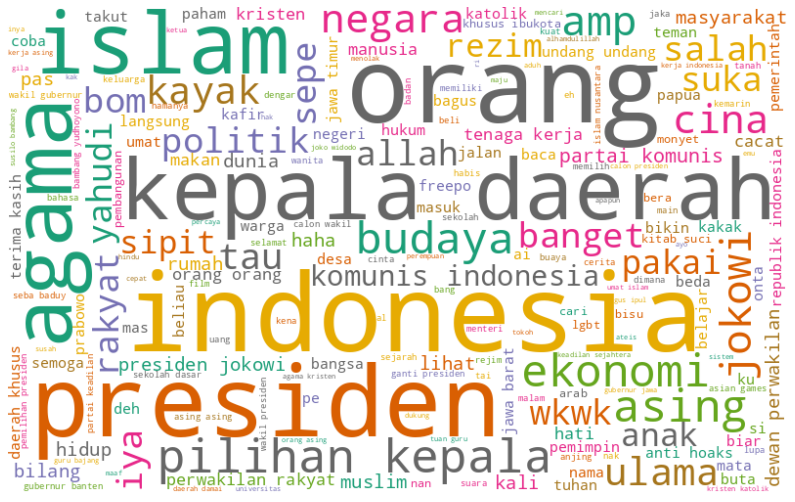

In [37]:
# wordcloud neutral

wordcloud_neutral = WordCloud(width=800,
                                 height=500,
                                 background_color="white",
                                 colormap="Dark2",
                                 random_state=21,
                                 max_font_size=110).generate(neutral)
plt.figure(figsize=(14, 12))
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.axis('off')
plt.show()

In [38]:
# wordcloud_neutral.to_file("../img/hate_speech.png")

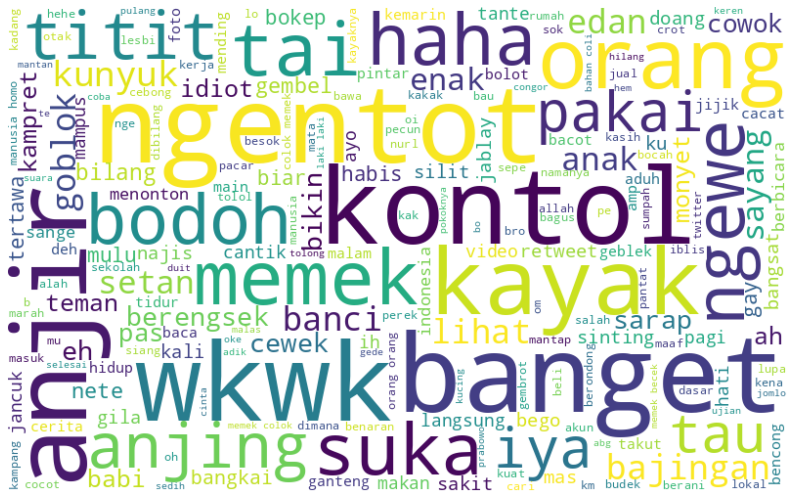

In [39]:
# wordcloud kalimat abusive

wordcloud_abusive = WordCloud(width=800,
                              height=500,
                              background_color="white",
                              random_state=21,
                              max_font_size=110).generate(abusive)
plt.figure(figsize=(14, 12))
plt.imshow(wordcloud_abusive, interpolation="bilinear")
plt.axis('off')
plt.show()

In [40]:
# wordcloud_abusive.to_file("../img/abusive.png")

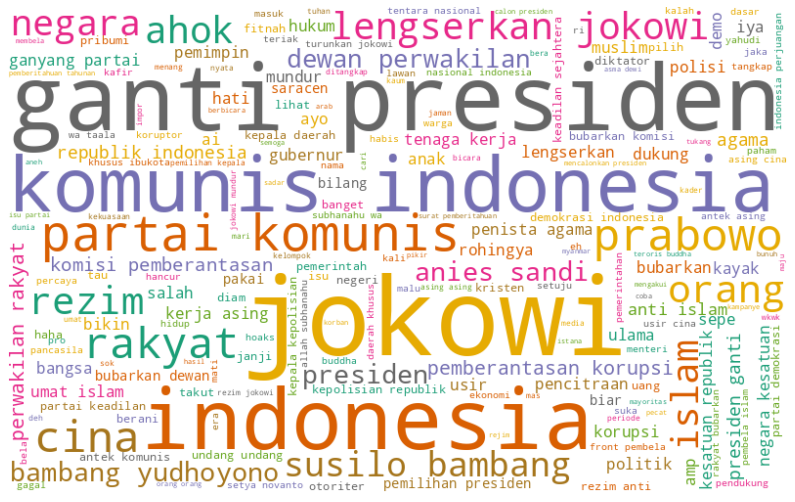

In [41]:
# wordcloud hate speech

wordcloud_hatespeech = WordCloud(width=800,
                      height=500,
                      colormap="Dark2",
                      background_color="white",
                      random_state=21,
                      max_font_size=110).generate(hate_speech)
plt.figure(figsize=(14, 12))
plt.imshow(wordcloud_hatespeech, interpolation="bilinear")
plt.axis('off')
plt.show()

In [42]:
# wordcloud_hatespeech.to_file("../img/hate_speech.png")

In [43]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

dataset['Char_Length_Prep'].iplot(
    kind='hist',
    bins=100,
    xTitle='Char_Length_prep',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution After Preprocessing')

In [48]:
dataset.dropna(inplace=True)

In [49]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_2_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_1_word = get_top_n_words(dataset['Stopwords'], 10)
common_2_word = get_top_2_bigram(dataset['Stopwords'], 10)
common_3_word = get_top_n_bigram(dataset['Stopwords'], 10)

In [50]:
common_1_word

[('indonesia', 1672),
 ('presiden', 1510),
 ('orang', 1425),
 ('jokowi', 1161),
 ('islam', 886),
 ('agama', 767),
 ('asing', 738),
 ('komunis', 729),
 ('rakyat', 688),
 ('2019', 633)]

In [51]:
common_2_word

[('ganti presiden', 430),
 ('2019 ganti', 382),
 ('komunis indonesia', 372),
 ('partai komunis', 366),
 ('kepala daerah', 337),
 ('pilihan kepala', 286),
 ('dewan perwakilan', 212),
 ('perwakilan rakyat', 208),
 ('presiden 2019', 174),
 ('republik indonesia', 173)]

In [52]:
common_3_word

[('2019 ganti presiden', 376),
 ('partai komunis indonesia', 365),
 ('pilihan kepala daerah', 286),
 ('dewan perwakilan rakyat', 208),
 ('susilo bambang yudhoyono', 151),
 ('komisi pemberantasan korupsi', 141),
 ('ganti presiden 2019', 112),
 ('partai keadilan sejahtera', 99),
 ('tenaga kerja asing', 97),
 ('negara kesatuan republik', 95)]

In [53]:
# The distribution of top unigrams after removing stop words

df1 = pd.DataFrame(common_1_word, columns = ['Stopword' , 'count'])
df1.groupby('Stopword').sum()['count'].sort_values(ascending=False).iplot(kind='bar',
                                                                       yTitle='Count',
                                                                       linecolor='black',
                                                                       title='Top 10 Words in Review After Removing Stopwords')

In [54]:
# The distribution of top bigrams after removing stop words

df3 = pd.DataFrame(common_3_word, columns = ['Stopword' , 'count'])
df3.groupby('Stopword').sum()['count'].sort_values(ascending=False).iplot(kind='bar',
                                                                       yTitle='Count',
                                                                       linecolor='black',
                                                                       title='Top 10 Trigrams in Review After Removing Stopwords')

In [55]:
# The distribution of top part-of-speech tags of review corpus

blob = TextBlob(str(dataset['Stopwords']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for review corpus')